In [6]:
# Import the pipeline class from the transformers module. 
from transformers import pipeline
# Initialize the pipeline to generate questions and answers using the distilbert-base-cased-distilled-squad model. 
question_answerer = pipeline("question-answering", model='distilbert-base-cased-distilled-squad')

In [7]:
# Import the Autotokenizer class from the transformers module. 
from transformers import AutoTokenizer
# Create an instance of the Autotokenizer class using the t5-base model.
tokenizer = AutoTokenizer.from_pretrained("t5-base")

In [8]:
# Import the SentenceTransformer class from the sentence_transformers library. 
from sentence_transformers import SentenceTransformer
# Use the all-MiniLM-L6-v2 model.
model = SentenceTransformer('all-MiniLM-L6-v2')

In [9]:
import pandas as pd

data=pd.read_csv('C:/Users/m8rqu/Documents/AI Bootcamp/Product-Review/spotify_reviews.csv')
data.head(10)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,437314fe-1b1d-4352-abea-12fec30fce58,Rajib Das,It's good,4,0,NaN,5/9/2024 16:28,NaN
1,4933ad2c-c70a-4a84-957d-d405439b2e0f,Mihaela Claudia Neagu,"I love this app so much, I've been using Spoti...",5,0,8.9.38.494,5/9/2024 16:27,8.9.38.494
2,1ab275fb-59bf-42c7-88ef-b85901f0445e,JONATHAN GRACIA,Perfect,5,0,8.9.36.616,5/9/2024 16:27,8.9.36.616
3,b38406eb-7b11-4ceb-a45c-d7f28fb5d382,Cam Rempel,Best all around music streaming app I have use...,5,0,8.9.38.494,5/9/2024 16:26,8.9.38.494
4,7be7999d-4cb6-47b9-8414-d7bdaa9df578,Your clowness (Her Clowness),Are y'all fr gatekeeping the play button on so...,1,0,8.9.38.494,5/9/2024 16:26,8.9.38.494
5,1c260703-26fb-404c-b7b0-dcbd2f93a415,Mike rangel,Loved it,5,0,8.9.38.494,5/9/2024 16:24,8.9.38.494
6,da994d51-21a9-4945-8e52-0c28406d8807,CHARISHMA CHARISHMA,The app is good but it will start to ask premi...,3,0,8.9.10.616,5/9/2024 16:23,8.9.10.616
7,1557d347-cdff-4fb4-a496-937ddff2e623,Robert Rankin,excellent app,5,0,8.9.38.494,5/9/2024 16:23,8.9.38.494
8,4538082e-23bd-4363-9c16-3b97171684a8,Jun Vallan,I like this spotify,5,0,NaN,5/9/2024 16:21,NaN
9,a0bdfc3d-ddba-49db-915f-36f37b4e9c2f,Danielle Joyce Perez,Eat the rich,1,0,8.9.30.433,5/9/2024 16:21,8.9.30.433


In [10]:
data.isna().sum()

reviewId                   0
userName                   4
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    5768
at                         0
appVersion              5768
dtype: int64

In [11]:
missing_review = data['reviewCreatedVersion'].isna()

In [12]:
missing_count_by_score = missing_review.groupby(data['score']).sum()
missing_count_by_score

score
1    2964
2     938
3     753
4     512
5     601
Name: reviewCreatedVersion, dtype: int64

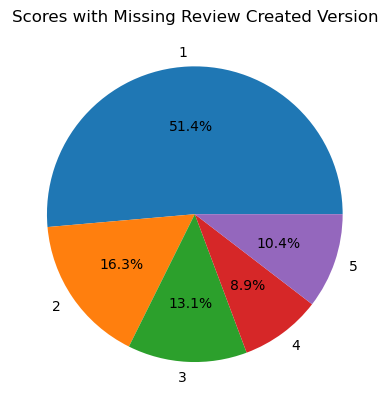

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.pie(missing_count_by_score,labels = missing_count_by_score.index,autopct='%1.1f%%')
plt.title('Scores with Missing Review Created Version')
plt.show()



In [14]:
not_missing_review = ~data['reviewCreatedVersion'].isna()
not_missing_count_by_score = not_missing_review.groupby(data['score']).sum()
not_missing_count_by_score


score
1    32096
2    12908
3    11266
4     9160
5    12967
Name: reviewCreatedVersion, dtype: int64

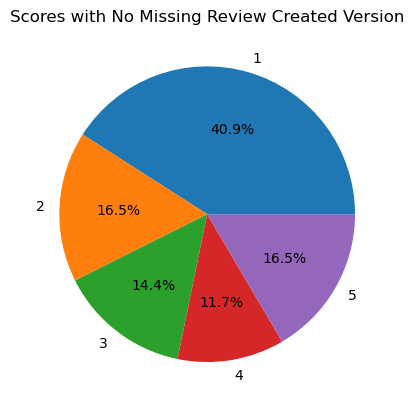

In [15]:
plt.pie(not_missing_count_by_score,labels = not_missing_count_by_score.index,autopct='%1.1f%%')
plt.title('Scores with No Missing Review Created Version')
plt.show()

In [16]:
scores = data['score'].value_counts()
scores

1    35060
2    13846
5    13568
3    12019
4     9672
Name: score, dtype: int64

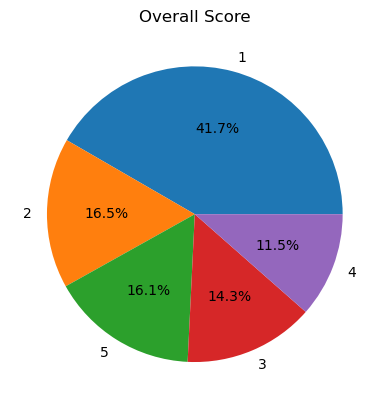

In [17]:
plt.pie(scores,labels = scores.index,autopct='%1.1f%%')
plt.title('Overall Score')
plt.show()

In [163]:
sentence = data['content'][9]

In [164]:
sentence

'Eat the rich'

In [19]:
embedding = model.encode(sentence)

In [20]:
embedding

array([-7.52871111e-02, -8.06995202e-03, -8.01240839e-03,  1.18287541e-02,
        5.34932725e-02,  3.81806842e-03,  6.88992739e-02,  1.85454860e-02,
       -3.64691131e-02, -3.56359640e-03,  1.28597515e-02, -8.44903104e-03,
        2.86890101e-02,  8.36028904e-03, -4.59290072e-02, -4.90545556e-02,
        4.98807877e-02, -8.55992287e-02, -3.38218408e-03, -2.76990924e-02,
       -1.30605295e-01,  6.76780567e-02,  8.32249969e-02,  1.43478950e-02,
        4.54347767e-02, -9.38695893e-02,  5.62009551e-02,  3.01078632e-02,
       -5.33602461e-02, -7.05764890e-02, -1.07269712e-01,  7.94779509e-02,
        5.09336144e-02, -1.77597180e-02, -3.66951637e-02, -3.64597403e-02,
       -2.34089401e-02, -4.17724513e-02,  2.13991404e-02, -1.88778788e-02,
        3.30073684e-02, -1.64506435e-02,  4.37521711e-02, -1.96863655e-02,
        1.51709802e-02,  8.73455405e-02,  2.16802306e-04, -2.82229409e-02,
        1.15414113e-01, -7.57743120e-02, -1.39506133e-02, -7.92050064e-02,
       -3.14990766e-02, -

In [21]:
embedded_text = []
for embed in data['content']:
    embedding = model.encode(embed)
    embedded_text.append(embedding)



In [22]:
scores = data['score']

In [31]:
embedded_data = pd.DataFrame({'Embedded_Text': embedded_text, 'scores': scores})
embedded_data.head()

,Embedded_Text,scores
0,"[-0.07528711, -0.008069952, -0.008012408, 0.01...",4
1,"[0.02737835, -0.07448656, 0.037231818, 0.03551...",5
2,"[0.0006989764, 0.042718764, -0.008330116, 0.03...",5
3,"[-0.037586506, -0.022200251, 0.02128829, -0.04...",5
4,"[-0.0064125387, -0.070205085, -0.011006628, -0...",1


In [24]:
import csv
embedded_data.to_csv('embedded', sep='\t')

In [25]:
embedded_data.to_excel('embedded_data.xlsx', index=False)

In [29]:
embedded_dataframe = pd.DataFrame(embedded_text,scores)

In [30]:
embedded_dataframe.head(5)

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
score,,,,,,,,,,,,,,,,,,,,,
4,-0.075287,-0.008070,-0.008012,0.011829,0.053493,0.003818,0.068899,0.018545,-0.036469,-0.003564,...,0.075158,-0.008076,0.012077,-0.021581,0.065525,-0.046075,0.025506,0.028272,0.076031,0.052080
5,0.027378,-0.074487,0.037232,0.035516,0.032172,0.093294,0.060106,-0.008529,0.078360,-0.051471,...,0.100013,0.012135,0.022617,-0.032717,-0.030168,0.070703,0.061777,-0.012428,0.033098,0.027247
5,0.000699,0.042719,-0.008330,0.035505,0.009377,-0.079481,0.036106,0.045617,-0.063060,0.009153,...,0.069454,-0.016221,0.020551,0.007986,-0.020657,0.040655,0.166003,0.020324,-0.040844,0.056649
5,-0.037587,-0.022200,0.021288,-0.041550,0.001563,0.091124,-0.026813,0.036370,-0.001909,-0.015366,...,0.098490,-0.011565,0.003142,-0.001764,-0.004068,0.079050,0.042176,0.054076,0.011520,0.091657
1,-0.006413,-0.070205,-0.011007,-0.091961,0.013903,0.094878,0.119910,-0.076193,0.017214,0.065204,...,0.112353,0.027080,0.014559,0.081321,-0.025713,0.012356,0.057037,0.033031,0.080894,-0.001555


In [36]:
embedded_df = pd.DataFrame(embedded_text)

score_df = pd.DataFrame(scores)

In [111]:
final_embed = pd.concat([embedded_df, score_df], axis=1)
final_embed.head()

,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,score
0,-0.075287,-0.008070,-0.008012,0.011829,0.053493,0.003818,0.068899,0.018545,-0.036469,-0.003564,...,-0.008076,0.012077,-0.021581,0.065525,-0.046075,0.025506,0.028272,0.076031,0.052080,4
1,0.027378,-0.074487,0.037232,0.035516,0.032172,0.093294,0.060106,-0.008529,0.078360,-0.051471,...,0.012135,0.022617,-0.032717,-0.030168,0.070703,0.061777,-0.012428,0.033098,0.027247,5
2,0.000699,0.042719,-0.008330,0.035505,0.009377,-0.079481,0.036106,0.045617,-0.063060,0.009153,...,-0.016221,0.020551,0.007986,-0.020657,0.040655,0.166003,0.020324,-0.040844,0.056649,5
3,-0.037587,-0.022200,0.021288,-0.041550,0.001563,0.091124,-0.026813,0.036370,-0.001909,-0.015366,...,-0.011565,0.003142,-0.001764,-0.004068,0.079050,0.042176,0.054076,0.011520,0.091657,5
4,-0.006413,-0.070205,-0.011007,-0.091961,0.013903,0.094878,0.119910,-0.076193,0.017214,0.065204,...,0.027080,0.014559,0.081321,-0.025713,0.012356,0.057037,0.033031,0.080894,-0.001555,1


In [175]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

y = final_embed['score'].values
X = final_embed.drop(['score'], axis = 1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size = .3)

In [176]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [177]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model - deep neural net with two hidden layers
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 5

# Create a sequential neural network model
nn = Sequential()

# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the third hidden layer
nn.add(Dense(units=hidden_nodes_layer3, activation="relu"))


# Add the output layer
nn.add(Dense(units=1, activation="linear"))

In [178]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [179]:
# Fit the model
deep_net_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
1842/1842 [==============================] - 3s 2ms/step - loss: 1.5701 - mse: 1.5701
Epoch 2/100
1842/1842 [==============================] - 4s 2ms/step - loss: 0.9781 - mse: 0.9781
Epoch 3/100
1842/1842 [==============================] - 3s 1ms/step - loss: 0.9321 - mse: 0.9321
Epoch 4/100
1842/1842 [==============================] - 3s 1ms/step - loss: 0.9083 - mse: 0.9083
Epoch 5/100
1842/1842 [==============================] - 3s 1ms/step - loss: 0.8857 - mse: 0.8857
Epoch 6/100
1842/1842 [==============================] - 3s 1ms/step - loss: 0.8731 - mse: 0.8731
Epoch 7/100
1842/1842 [==============================] - 3s 1ms/step - loss: 0.8565 - mse: 0.8565
Epoch 8/100
1842/1842 [==============================] - 3s 1ms/step - loss: 0.8446 - mse: 0.8446
Epoch 9/100
1842/1842 [==============================] - 3s 1ms/step - loss: 0.8360 - mse: 0.8360
Epoch 10/100
1842/1842 [==============================] - 3s 1ms/step - loss: 0.8244 - mse: 0.8244
Epoch 11/100
1842/1

In [180]:
# Create a DataFrame using the model history and an index parameter
model_plot = pd.DataFrame(deep_net_model.history, index=range(1, len(deep_net_model.history["loss"]) + 1))

## Evaluating Model Performance

In [181]:
model1_loss, model1_mse = nn.evaluate(X_test_scaled, y_test, verbose=2)

790/790 - 1s - loss: 1.0837 - mse: 1.0837 - 939ms/epoch - 1ms/step


<AxesSubplot:>

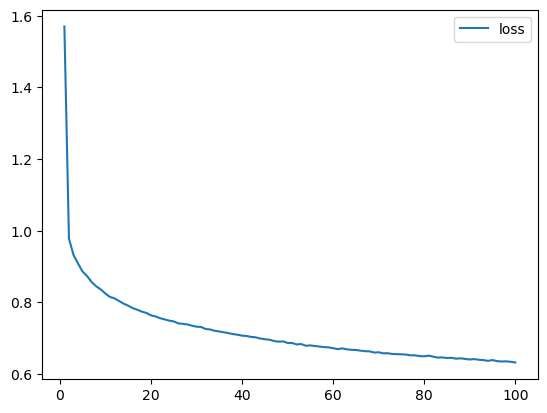

In [182]:
# Visualize the model plot where the y-axis displays the loss metric
model_plot.plot(y="loss")

<AxesSubplot:>

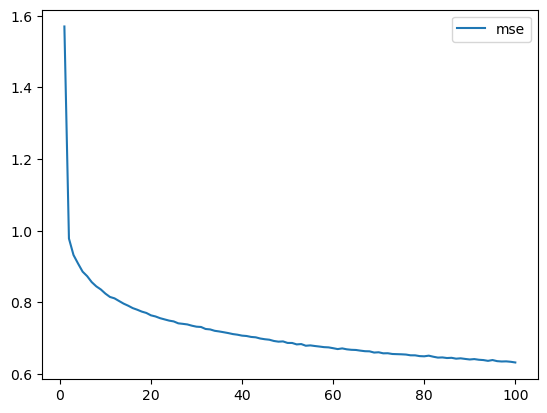

In [183]:
# Visualize the model plot where the y-axis displays the mse
model_plot.plot(y="mse")

## Making Predictions

In [184]:
# Make predictions on the testing data
predictions = nn.predict(X_test_scaled).round().astype("int32")

790/790 [==============================] - 1s 955us/step


In [185]:
# Create a DataFrame to compare the predictions with the actual values
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": y_test})

# Display sample data
results.head(10)

,predictions,actual
0,3,3
1,1,1
2,2,1
3,3,1
4,1,1
5,1,1
6,1,1
7,1,1
8,2,3
9,2,2


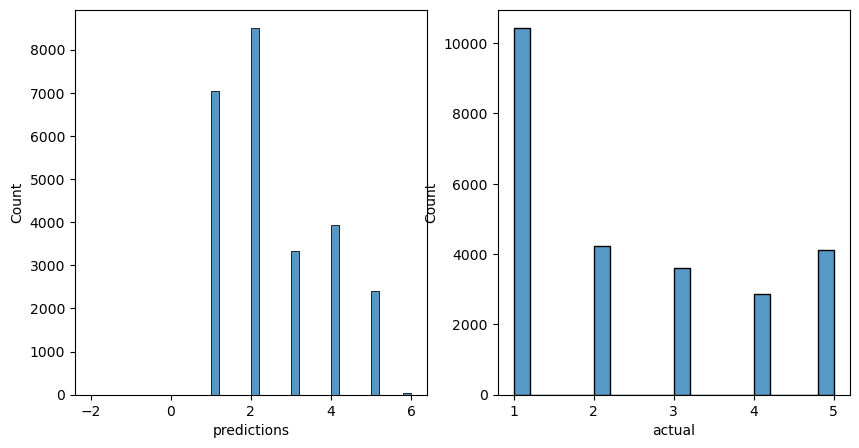

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.histplot(results['predictions'], ax=ax1)
sns.histplot((results['actual']),ax=ax2)
plt.show()

In [187]:
from sklearn.linear_model import LogisticRegression


logistic_regression_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic_regression_model


LogisticRegression(multi_class='multinomial')

In [188]:
lr_model = logistic_regression_model.fit(X_train_scaled, y_train)

# Review the predictions
testing_predictions = lr_model.predict(X_test_scaled)
testing_predictions

c:\Users\m8rqu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([5, 1, 1, ..., 1, 1, 1], dtype=int64)

In [189]:
accuracy_score(y_test, testing_predictions)

0.5748514851485148

In [190]:
print(f"Training Data Score: {logistic_regression_model.score(X_train, y_train)}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test, y_test)}")

Training Data Score: 0.418076890435373
Testing Data Score: 0.413029702970297


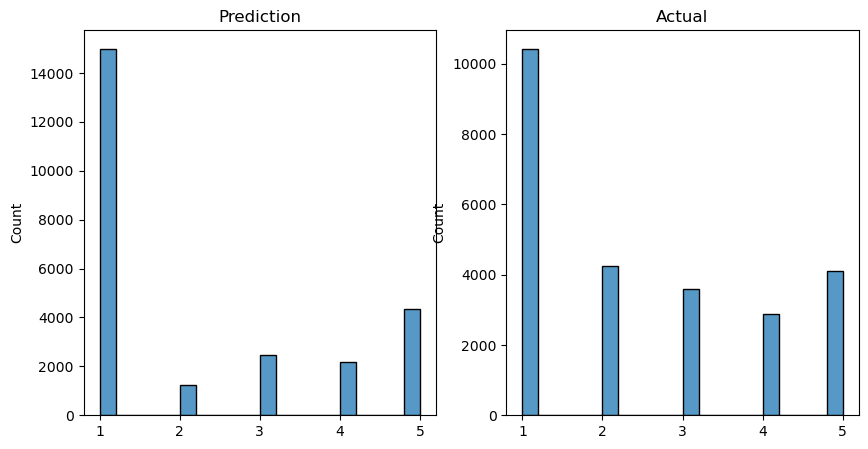

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.histplot(testing_predictions, ax=ax1)
sns.histplot((y_test),ax=ax2)

ax1.set_title('Prediction')
ax2.set_title('Actual')

plt.show()